# Проект: Банки — Анализ оттока клиентов

## Задача, этапы выполнения и описание данных:

### Задача. 
- Проанализируйте клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.
- Проведите исследовательский анализ данных, определите все значимые признаки отточности (интервалы значений характеристик, которые связаны с повышенным оттоком, сравните портреты типичных клиентов, которые склонны и не склонны уходить из банка и т.д)
- Сформулируйте и проверьте статистические гипотезы.
- Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.
- Сформулируйте и проверьте статистическую гипотезу относительно представленных данных, которая поможет внести ясность в исследование
- Объединяя признаки отточности, сформируйте сегменты, отберите из них лучшие и дайте по ним рекомендации

### Этапы выполнения
- предобработка данных
- кодирование для анализа корреляции
- составить протрет клиента, который склонен уходить из банка, составление сегментов на основе категорий пользователей с наивысшим оттоком
- корреляционный анализ
- проверка гипотез
- сегментация, приоретизация
- рекомендации по исправлению, составление презентации

### Описание данных 

**bank_scrooge.csv** <br>

`USERID` идентификатор пользователя <br>
`score` — баллы кредитного скоринга <br>
`city` — город <br>
`gender` — пол <br>
`age` — возраст <br>
`equity` — количество баллов собственности <br>
`balance` — баланс на счёте <br>
`products` - количество продкутов, которыми пользуется клиент <br>
`credit_card` — есть ли кредитная карта <br>
`last_activity` — активный клиент <br>
`EST_SALARY` — оценочный доход клиента <br>
`сhurn` — признак оттока

### Презентация

https://disk.yandex.ru/i/85vm1ovfb42ZDA

## Импорт и предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
try:
    import phik
except:
    !pip install phik -q
import phik
from phik import phik_matrix
from matplotlib import rcParams

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [3]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Есть пропуски в колонке возраста и баланса. Пропуски возраста можно удалить, их всего 26. Пропуски баланса нужно проверить. А также, изменить названия некоторых колонок и типы данных

In [5]:
data.rename(columns={'USERID':'user_id', 'EST_SALARY':'est_salary'}, inplace= True)

In [6]:
data = data.dropna(subset=['age']).reset_index(drop=True)

In [7]:
data['age'] = data['age'].astype('int')

In [8]:
data['score'] = data['score'].astype('int')

In [9]:
print(data.duplicated().sum())
print(data['user_id'].duplicated().sum())
data.query('user_id == 199312')

0
50


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2496,199312,948,Ярославль,М,41,5,3095721.85,4,1,1,307234.69,1
8804,199312,911,Рыбинск,Ж,43,0,NaN,2,1,1,152189.72,0


В датафрейме есть пользователи с одинаковым user_id. Прогнав этих пользователей через query, можно сделать вывод, что это разные люди, у которых отличается город - возможно, для каждого города user_id сбрасывается и не зависит от других городов.

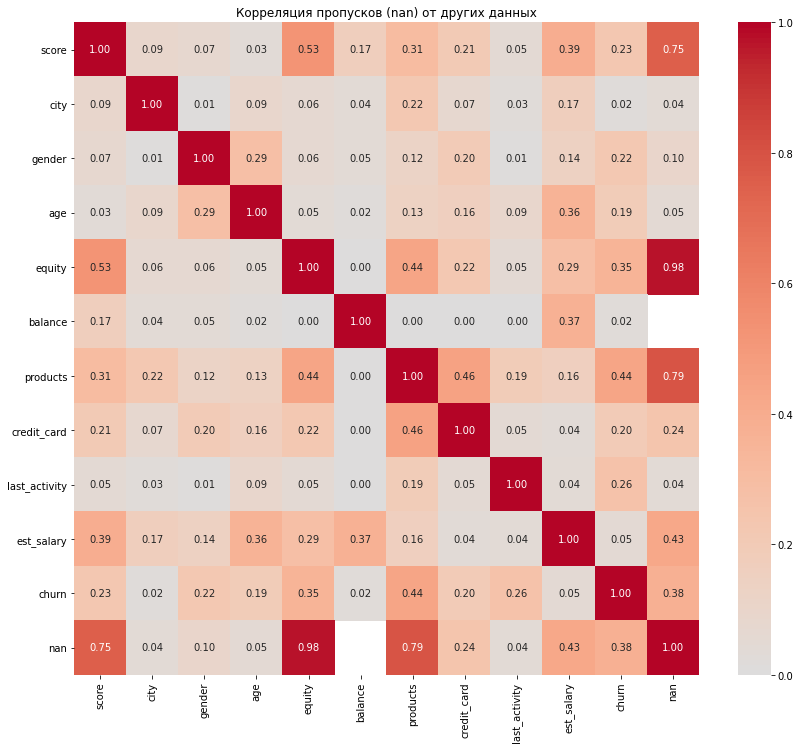

In [10]:
data_corr = data.copy()
data_corr.drop('user_id', axis=1, inplace=True)
data_corr['nan'] = data['balance'].isnull().astype(int)
plt.figure(figsize = (14, 12))
sns.heatmap(
    data_corr.phik_matrix(interval_cols=['score', 'age', 'balance', 'est_salary']), 
    center=0,
    annot = True, 
    fmt = '.2f',
    cmap='coolwarm'
)
plt.title('Корреляция пропусков (nan) от других данных')
plt.show()

Пропуски баланса коррелируют со столбцами equity, score, products. Пропуски не случайны, их заполнение невозможно, а удаление повлияет на данные. MNAR - тип пропуска

In [11]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

В датафрейме данные о трех городах

In [12]:
data['products'].unique()

array([2, 3, 1, 4, 5, 0])

In [13]:
data = data.query('products!=0')

Есть клиенты, у которых количество продуктов = 0 (1 человек). Удалил эту строку, тк у клиента банка должно быть от 1 продукта

In [14]:
data['cty_dum'] = data['city']
data['gen_dum'] = data['gender']
data = pd.get_dummies(data, columns = ['cty_dum', 'gen_dum'], prefix='', prefix_sep='')
display(data.head())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,Ж,М
0,183012,850,Рыбинск,Ж,25,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861,Рыбинск,Ж,37,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730,Ярославль,М,34,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9973
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   int64  
 1   score          9973 non-null   int64  
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   int64  
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_salary     9973 non-null   float64
 11  churn          9973 non-null   int64  
 12  Ростов         9973 non-null   uint8  
 13  Рыбинск        9973 non-null   uint8  
 14  Ярославль      9973 non-null   uint8  
 15  Ж              9973 non-null   uint8  
 16  М              9973 non-null   uint8  
dtypes: float64(2), int64(8), object(2), uint8(5)
memory 

**Вывод по предобработке:**
- колонки приведены к snake_case и правильному типу данных
- удалены пропуски в колонке возраста
- с пропусками в столбце balance ничего сделать нельзя, так как тип пропусков MNAR
- категориальные переменные были закодированы 
- явных дубликатов нет, а дубликаты по user_id - разные люди в разных городах

Датафрейм готов к дальнейшему анализу

## Исследовательский анализ данных, категоризация

### Распределения

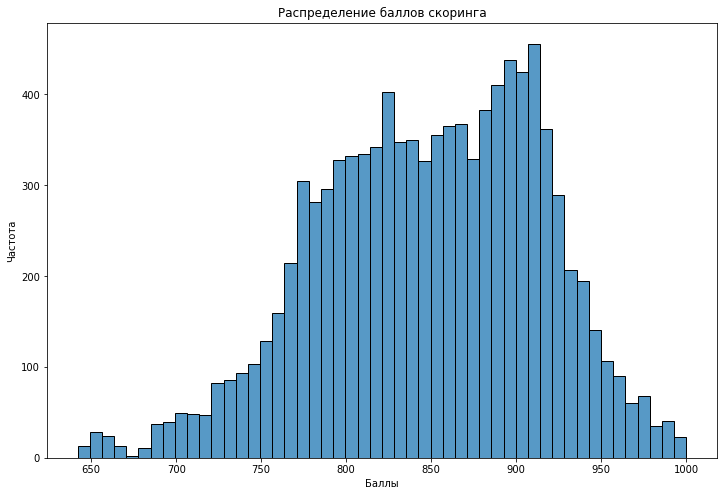

count    9973.000000
mean      848.671212
std        65.393153
min       642.000000
25%       802.000000
50%       853.000000
75%       900.000000
max      1000.000000
Name: score, dtype: float64

In [16]:
rcParams['figure.figsize'] = 12, 8
sns.histplot(data = data, x ='score', bins=50)
plt.title('Распределение баллов скоринга')
plt.xlabel('Баллы')
plt.ylabel('Частота')
plt.show()
data['score'].describe()

**По распределению баллов скоринга**
- в основном, у большинства клиентов от 770 до 930 баллов доверия
- самый низкий балл - 642, самый высокий - 1000
- среднее и медиана держатся на уровне 850 баллов

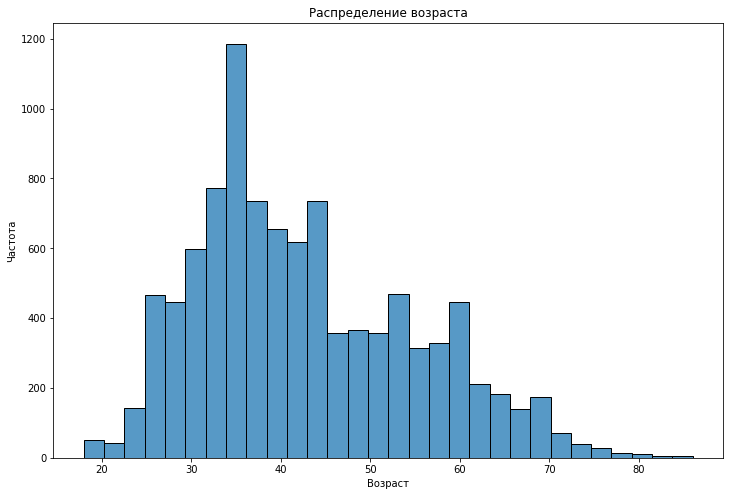

count    9973.000000
mean       42.730773
std        12.175166
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

In [17]:
rcParams['figure.figsize'] = 12, 8
sns.histplot(data = data, x ='age', bins=30)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()
data['age'].describe()

**По распределению возраста**
- самый младший клиент - 18 лет, самый старший - 86
- в основном, клиенты банка это люди от 24 до 60 лет
- много клиентов в возрасте 34-36 лет
- медиана: 40 лет

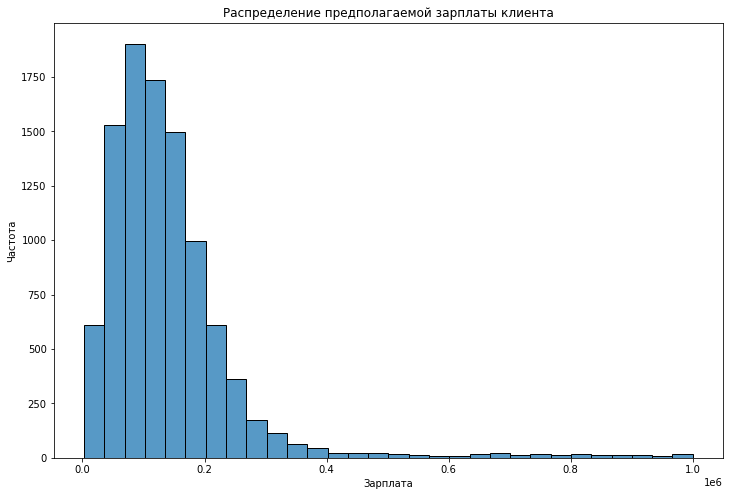

count    9.973000e+03
mean     1.477991e+05
std      1.392871e+05
min      2.546300e+03
25%      7.525202e+04
50%      1.196431e+05
75%      1.745000e+05
max      1.395064e+06
Name: est_salary, dtype: float64

In [18]:
rcParams['figure.figsize'] = 12, 8
sns.histplot(data = data.query('est_salary < 1000000'), x='est_salary', bins=30)
plt.title('Распределение предполагаемой зарплаты клиента')
plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.show()
data['est_salary'].describe()

**По распределению предполагаемой зарплаты клиента**
- В основном, клиенты банка получают от 30 до 200 тысяч рублей
- Максимальная зарплата - 1,4 млн. р., минимальная - 2540. Есть выбросы
- Медиана - 119000р

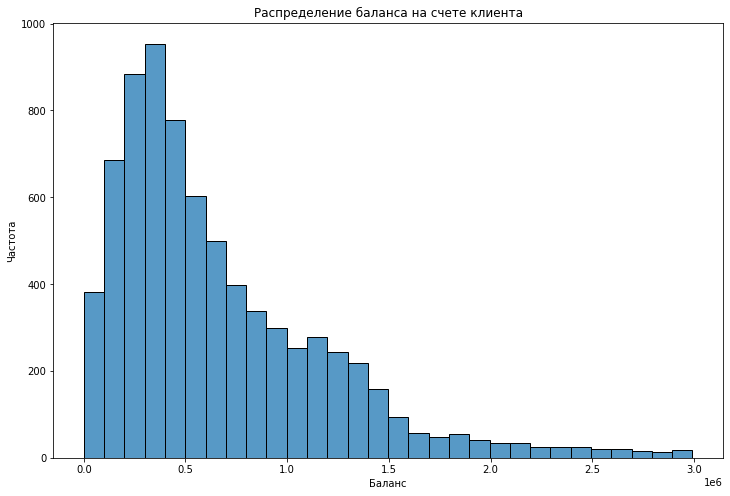

count    7.695000e+03
mean     8.272456e+05
std      1.980327e+06
min      0.000000e+00
25%      2.956987e+05
50%      5.242953e+05
75%      9.800512e+05
max      1.191136e+08
Name: balance, dtype: float64

In [19]:
rcParams['figure.figsize'] = 12, 8
sns.histplot(data = data.query('balance < 3000000'), x ='balance', bins=30)
plt.title('Распределение баланса на счете клиента')
plt.xlabel('Баланс')
plt.ylabel('Частота')
plt.show()
data['balance'].describe()

**По распределению баланса на счете**
- есть большие выбросы из-за максимального баланса 
- в основном, у клиента банка на балансе от 0р до 1.8 млн. р. 
- медиана - 520т.р.

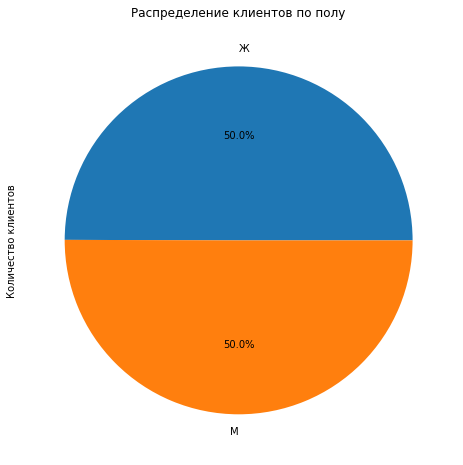

In [20]:
gender = data.groupby(['gender']).agg({'user_id':'count'})
fig1,ax1 = plt.subplots()
ax1.pie(gender['user_id'], labels=gender.index, autopct='%1.1f%%')
ax1.set_title('Распределение клиентов по полу')
plt.ylabel('Количество клиентов')
plt.show()

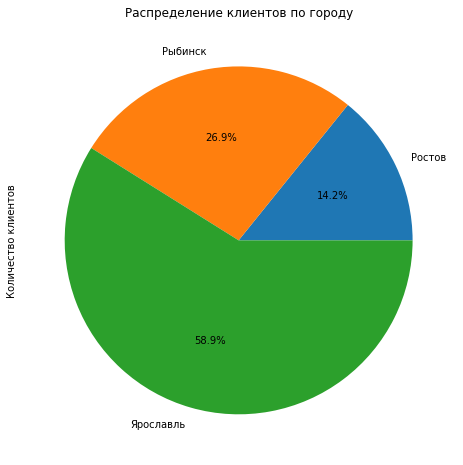

In [21]:
city = data.groupby(['city']).agg({'user_id':'count'})
fig1,ax1 = plt.subplots()
ax1.pie(city['user_id'], labels=city.index, autopct='%1.1f%%')
ax1.set_title('Распределение клиентов по городу')
plt.ylabel('Количество клиентов')
plt.show()

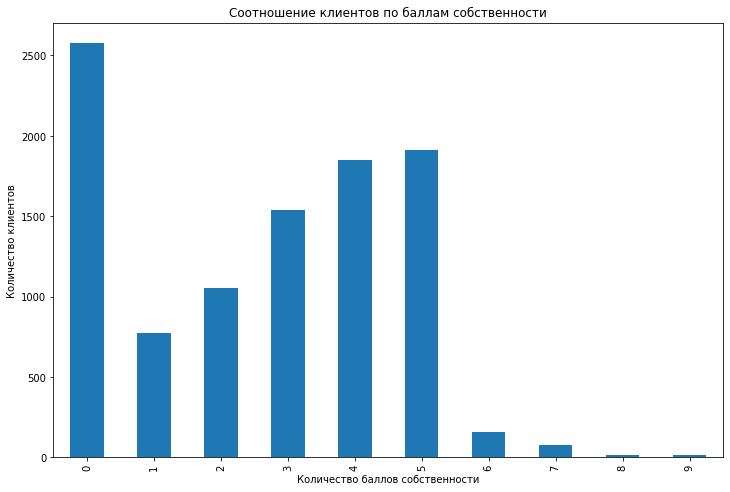

In [22]:
equity = data.groupby(['equity'])['user_id'].count().plot(kind='bar', y='count')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество баллов собственности')
plt.title('Соотношение клиентов по баллам собственности')
plt.show()

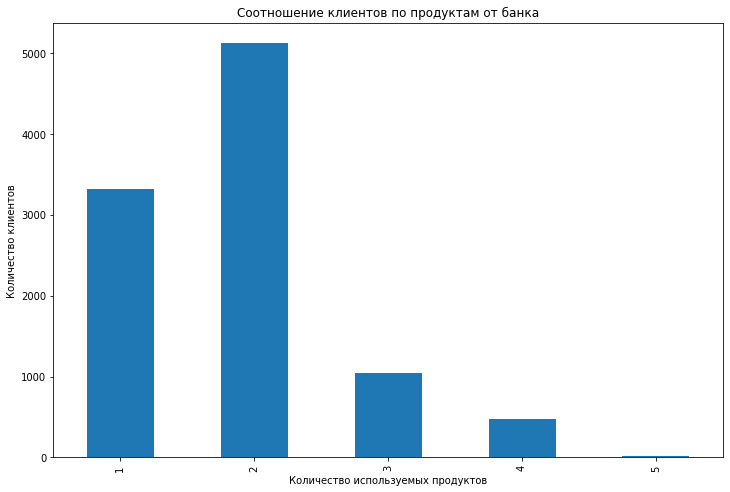

In [23]:
data.groupby('products')['user_id'].count().plot(kind='bar', y='count')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество используемых продуктов')
plt.title('Соотношение клиентов по продуктам от банка')
plt.show()

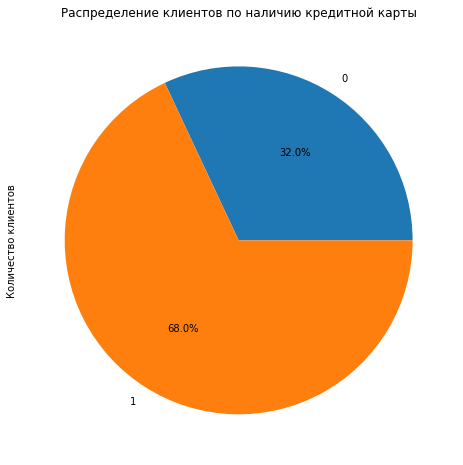

In [24]:
credit = data.groupby(['credit_card']).agg({'user_id':'count'})
fig1,ax1 = plt.subplots()
ax1.pie(credit['user_id'], labels=credit.index, autopct='%1.1f%%')
ax1.set_title('Распределение клиентов по наличию кредитной карты')
plt.ylabel('Количество клиентов')
plt.show()

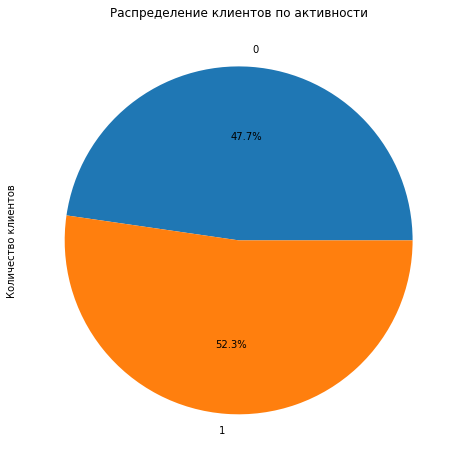

In [25]:
active = data.groupby(['last_activity']).agg({'user_id':'count'})
fig1,ax1 = plt.subplots()
ax1.pie(active['user_id'], labels=active.index, autopct='%1.1f%%')
ax1.set_title('Распределение клиентов по активности')
plt.ylabel('Количество клиентов')
plt.show()

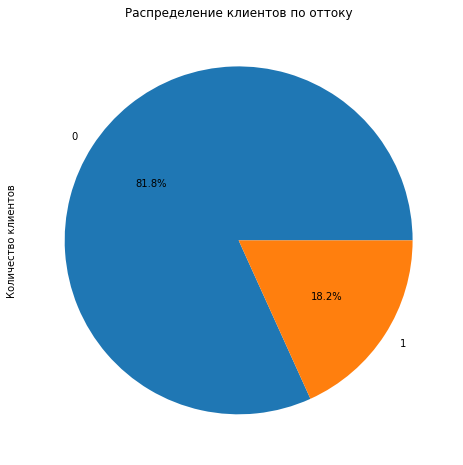

In [26]:
churn = data.groupby(['churn']).agg({'user_id':'count'})
fig1,ax1 = plt.subplots()
ax1.pie(churn['user_id'], labels=churn.index, autopct='%1.1f%%')
ax1.set_title('Распределение клиентов по оттоку')
plt.ylabel('Количество клиентов')
plt.show()

**Итого по распределениям, у большинства клиентов:**
- от 770 до 930 баллов доверия
- возраст от 24 до 60 лет, много клиентов в возрасте 34-36 лет
- зарплата от 30 до 200 тысяч рублей
- на балансе от 0р до 1.8 млн. р.

**Далее - категориальные**

- женщин и мужчин - равное количество
- в Ярославле больше половины клиентов, затем Рыбинск, Ростов
- много клиентов с 0 баллами собственности, затем постепенный рост по баллам собственности от 1 до 5, следом - резкий спад
- в основном, клиент пользуется 1 или 2 продуктами от банка
- у большинства (68%) есть кредитная карта
- 52% клиентов были активны за последний месяц
- 18% клиентов с признаками оттока

### Распределения по оттоку

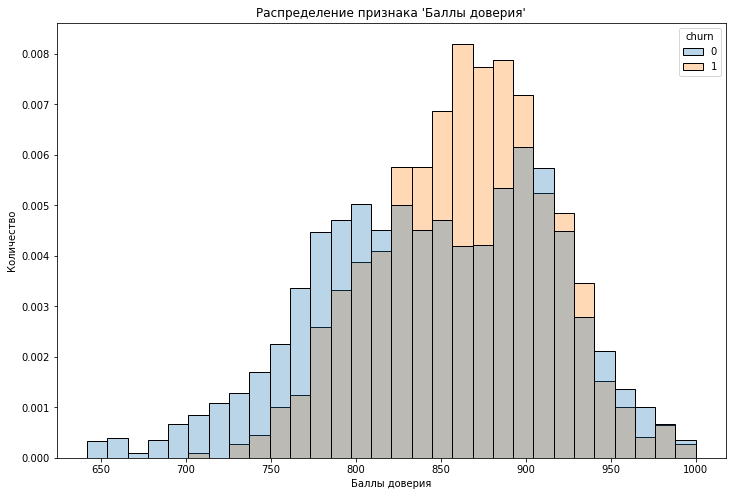

In [27]:
fig, axs = plt.subplots(figsize=(12, 8))
sns.histplot(data=data, x=data['score'], hue='churn', stat='density', common_norm=False, bins = 30, alpha=0.3)
plt.title("Распределение признака 'Баллы доверия'")
plt.ylabel("Количество")
plt.xlabel('Баллы доверия')
plt.show()

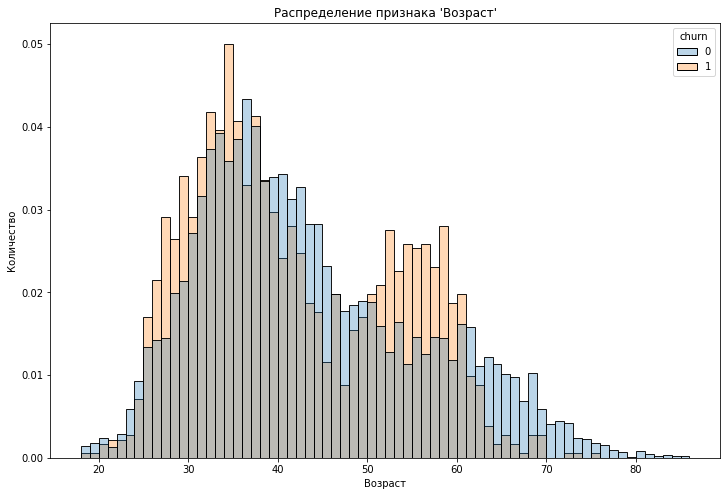

In [28]:
fig, axs = plt.subplots(figsize=(12, 8))
sns.histplot(data=data, x=data['age'], hue='churn', stat='density', common_norm=False, bins = 68, alpha=0.3)
plt.title("Распределение признака 'Возраст'")
plt.ylabel("Количество")
plt.xlabel('Возраст')
plt.show()

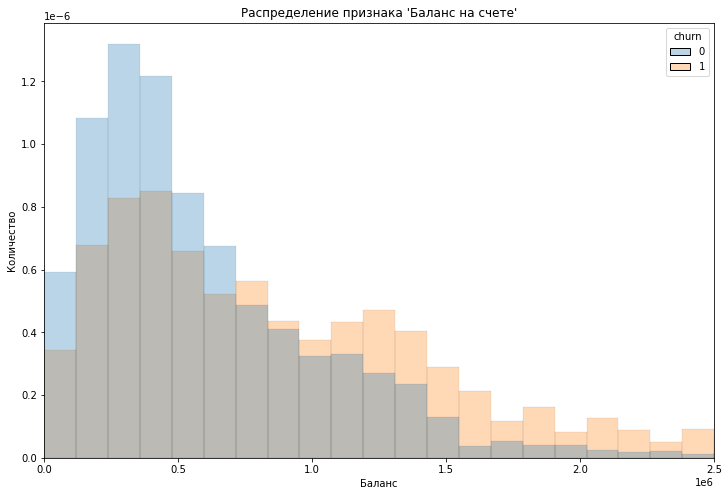

In [29]:
fig, axs = plt.subplots(figsize=(12, 8))
sns.histplot(data=data, x=data['balance'], hue='churn', stat='density', common_norm=False, bins = 1000, alpha=0.3)
plt.title("Распределение признака 'Баланс на счете'")
plt.ylabel("Количество")
plt.xlabel('Баланс')
axs.set_xlim(0, 2500000)
plt.show()

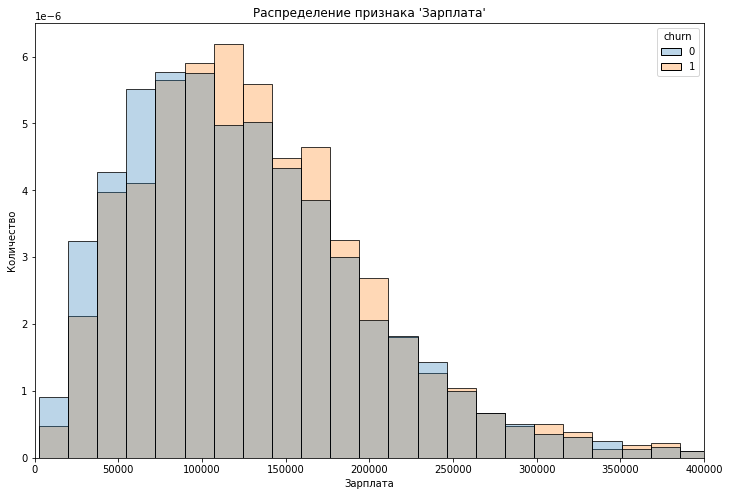

In [30]:
fig, axs = plt.subplots(figsize=(12, 8))
sns.histplot(data=data, x=data['est_salary'], hue='churn', stat='density', common_norm=False, bins = 80, alpha=0.3)
plt.title("Распределение признака 'Зарплата'")
plt.ylabel("Количество")
plt.xlabel('Зарплата')
axs.set_xlim(0, 400000)
plt.show()

Далее, просмотрим отточность по категориальным переменным и сделаем выводы 

Распределение по признаку city


,city,notchurn,churn,percent
0,Ростов,1151,265,0.2302
1,Рыбинск,2246,436,0.1941
2,Ярославль,4758,1117,0.2348


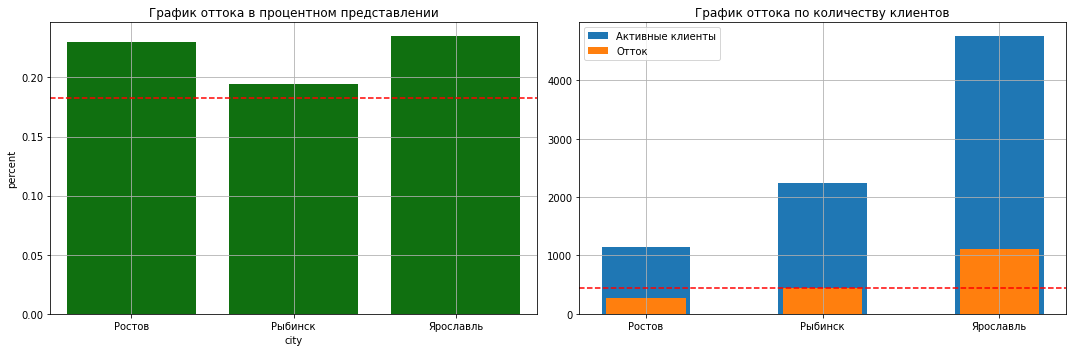

------------------------------------------------------------------------------------------


Распределение по признаку gender


,gender,notchurn,churn,percent
0,Ж,4347,635,0.1461
1,М,3808,1183,0.3107


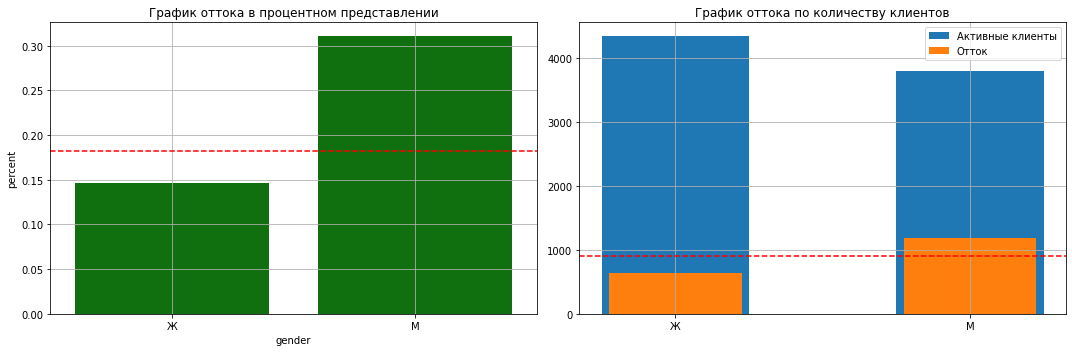

------------------------------------------------------------------------------------------


Распределение по признаку equity


,equity,notchurn,churn,percent
0,0,2486,90,0.0362
1,1,680,93,0.1368
2,2,885,166,0.1876
3,3,1219,321,0.2633
4,4,1383,464,0.3355
5,5,1339,576,0.4302
6,6,103,58,0.5631
7,7,43,37,0.8605
8,8,11,6,0.5455
9,9,6,7,1.1667


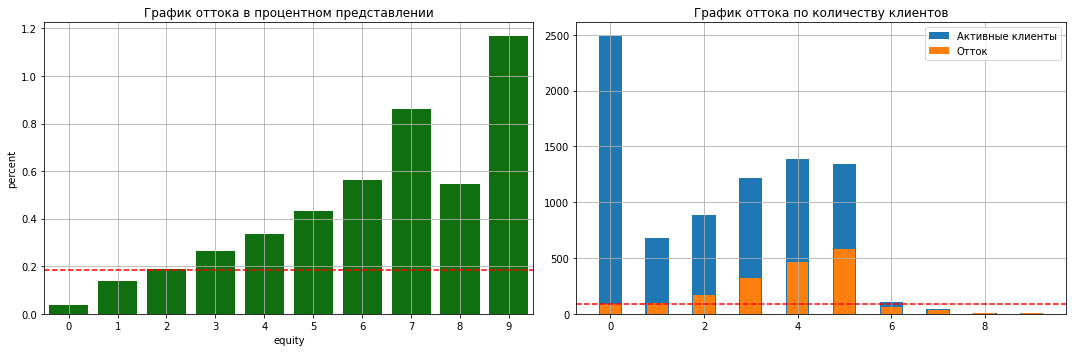

------------------------------------------------------------------------------------------


Распределение по признаку products


,products,notchurn,churn,percent
0,1,3088,235,0.0761
1,2,4141,978,0.2362
2,3,741,297,0.4008
3,4,174,300,1.7241
4,5,11,8,0.7273


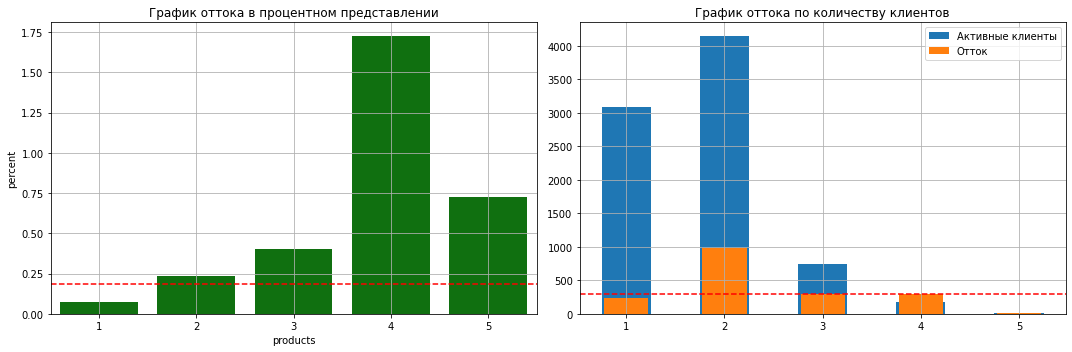

------------------------------------------------------------------------------------------


Распределение по признаку credit_card


,credit_card,notchurn,churn,percent
0,0,2374,815,0.3433
1,1,5781,1003,0.1735


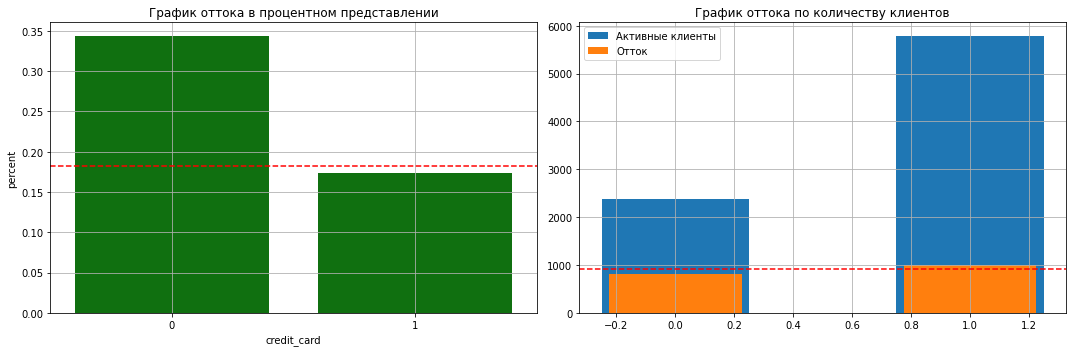

------------------------------------------------------------------------------------------


Распределение по признаку last_activity


,last_activity,notchurn,churn,percent
0,0,4217,541,0.1283
1,1,3938,1277,0.3243


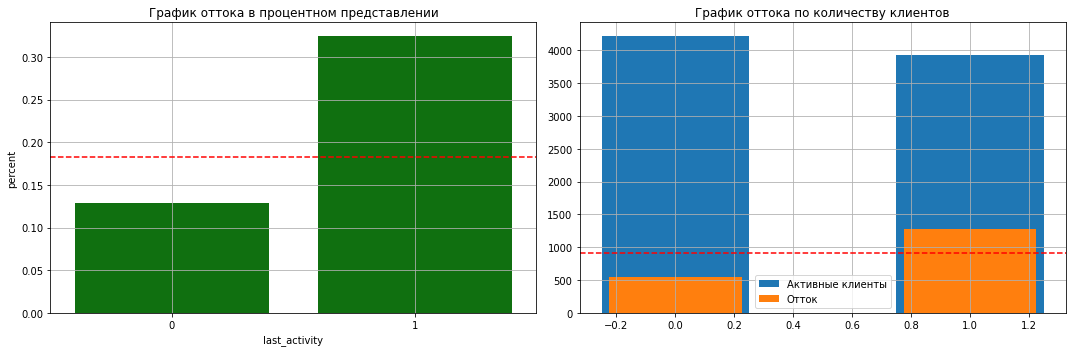

------------------------------------------------------------------------------------------




In [31]:
for i in ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity']:
    print(f'Распределение по признаку {i}')
    cat_churn = data.pivot_table(index=[i], columns='churn', values='user_id', aggfunc='count').reset_index()
    cat_churn.columns = (f"{i}", 'notchurn', 'churn')
    cat_churn['percent'] = (cat_churn['churn']/cat_churn['notchurn'] ).round(4)
    display(cat_churn)
    
    plt.figure(figsize=(15, 5))
    
    ax1 = plt.subplot(1, 2, 1)
    sns.barplot(x=cat_churn[i], y=cat_churn['percent'], data=cat_churn[i], color='green')
    plt.axhline(y=data['churn'].mean(), color='r', linestyle = '--')
    plt.grid()
    plt.title('График оттока в процентном представлении')
    
    
    ax2 = plt.subplot(1, 2, 2)
    plt.bar(cat_churn[i], cat_churn['notchurn'], width = 0.5, label='Активные клиенты')
    plt.bar(cat_churn[i], cat_churn['churn'], width=0.45, label='Отток')
    plt.axhline(y=cat_churn['churn'].median(), color='r', linestyle = '--')
    plt.grid()
    plt.legend()
    plt.title('График оттока по количеству клиентов')
    
    plt.tight_layout()
    plt.show() 
    
    print('------------------------------------------------------------------------------------------')
    print()
    print()

_**Итого по распределению оттока**_

**Чаще всего уходят клиенты:**
- с высоким рейтингом доверия от 830 до 940
- с возрастом клиента 25-35 и 50-60
- с балансом на счете от 700 и далее
- с зарплатой от 100 тысяч и далее (в основном, до 200)
- жители Ярославля (большой город и самый большой процент оттока в соотношении с другими городами), за ним - Ростов
- мужчины (процент оттока 31%)
- клиенты с 3 и выше единицами собственности (процент оттока возрастает по мере повышения числа объъектов собственности. По числу клиентов - начиная с 2 единиц собственности отток уже ощущается)
- клиенты пользующиеся 3 и более продуктами банка (4 продукта - отток 170%)
- клиенты, не имеющие кредитную карту, по процентному соотношению (но общий отток больше у тех, кто имеет кредитку, т.к. клиентов с ней большинство)
- клиенты, которые пользовались банком в течении последнего месяца уходят с большей вероятностью (32%), чем те, кто не был активен (12%)

### Корреляционный анализ

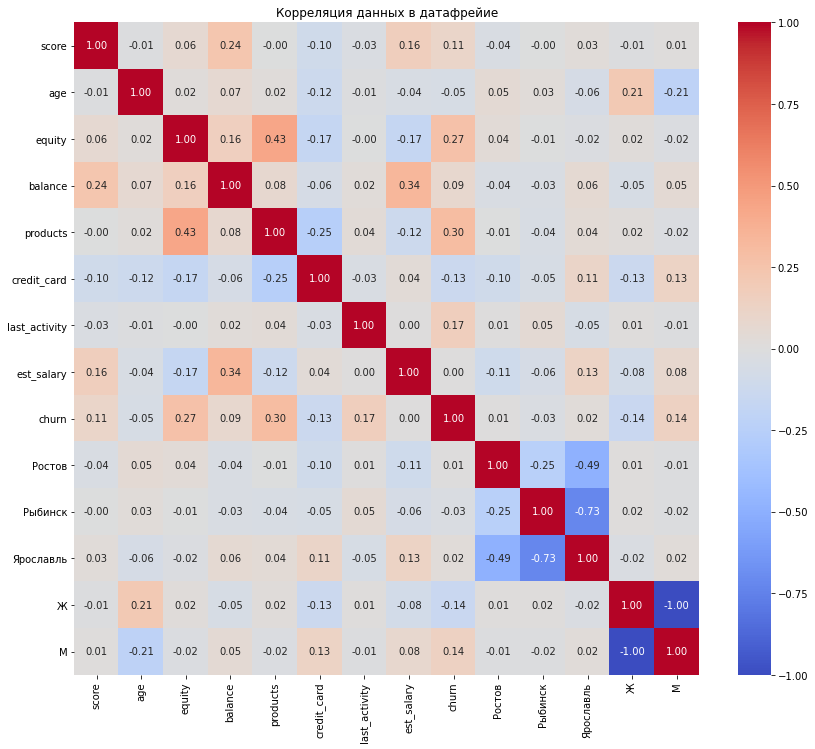

In [32]:
data_corr = data.copy()
data_corr.drop('user_id', axis=1, inplace=True)
plt.figure(figsize = (14, 12))
sns.heatmap(
    data_corr.corr(),
    annot = True, 
    center=0,
    fmt = '.2f',
    cmap='coolwarm'
)
plt.title('Корреляция данных в датафрейие')
plt.show()

**По анализу корреляции**
- прослеживается небольшая положительная корреляция между churn и признаками: score, equity, products, last_activity, gender(Мужчины). **По шкале Чеддока корреляция с этими признаками - от 10 до 30% - слабая связь корреляции. Также, есть обратная слабая связь (-10% до -30%) со столбцами credit_card и gender(Женщины)**

_**Общий вывод по ИАД**_

**Распределение в среднем по данным:**
- от 770 до 930 баллов доверия
- возраст от 24 до 60 лет, много клиентов в возрасте 34-36 лет
- зарплата от 30 до 200 тысяч рублей
- на балансе от 0р до 1.8 млн. р.
- женщин и мужчин - равное количество
- в Ярославле больше половины клиентов, затем Рыбинск, Ростов
- много клиентов с 0 баллами собственности, затем постепенный рост по баллам собственности от 1 до 5, следом - резкий спад
- в основном, клиент пользуется 1 или 2 продуктами от банка
- у большинства (68%) есть кредитная карта
- 52% клиентов были активны за последний месяц
- 18% клиентов с признаками оттока

**Распределение по признакам оттока (чаще всего уходят клиенты):**
- с высоким рейтингом доверия от 830 до 940
- с возрастом клиента 25-35 и 50-60
- с балансом на счете от 700 и далее
- с зарплатой от 100 тысяч и далее (в основном, до 200)
- жители Ярославля (большой город и самый большой процент оттока в соотношении с другими городами), за ним - Ростов
- мужчины (процент оттока 31%)
- клиенты с 3 и выше единицами собственности (процент оттока возрастает по мере повышения числа объъектов собственности. По числу клиентов - начиная с 2 единиц собственности отток уже ощущается)
- клиенты пользующиеся 3 и более продуктами банка (4 продукта - отток 170%)
- клиенты, не имеющие кредитную карту, по процентному соотношению (но общий отток больше у тех, кто имеет кредитку, т.к. клиентов с ней большинство)
- клиенты, которые пользовались банком в течении последнего месяца уходят с большей вероятностью (32%), чем те, кто не был активен (12%)

**Анализ корреляции**
- прослеживается небольшая положительная корреляция между churn и признаками: score, equity, products, last_activity, gender(Мужчины). **По шкале Чеддока корреляция с этими признаками - от 10 до 30% - слабая связь корреляции. Также, есть обратная слабая связь (-10% до -30%) со столбцами credit_card и gender(Женщины)**

## Проверка гипотез

Проверка гипотез через метод t-test - приоритетна. Но нужно, чтобы были выполнены три условия:
- Генеральные совокупности не зависят друг от друга (нельзя, если сравниваются данные до и после изменений)
- Выборочные средние нормально распределены (чем больше выборка - тем лучше)
- Дисперсии рассматриваемых генеральных совокупностей равны (если есть подозрения на неравномерность - equal_var=False)

Разделим данные на клиентов без признаков и с признаками оттока

In [33]:
data_churn_0 = data.query('churn == 0')
display(data_churn_0.shape[0])
data_churn_1 = data.query('churn == 1')
display(data_churn_1.shape[0])
data.info()

8155

1818

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9973
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9973 non-null   int64  
 1   score          9973 non-null   int64  
 2   city           9973 non-null   object 
 3   gender         9973 non-null   object 
 4   age            9973 non-null   int64  
 5   equity         9973 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9973 non-null   int64  
 8   credit_card    9973 non-null   int64  
 9   last_activity  9973 non-null   int64  
 10  est_salary     9973 non-null   float64
 11  churn          9973 non-null   int64  
 12  Ростов         9973 non-null   uint8  
 13  Рыбинск        9973 non-null   uint8  
 14  Ярославль      9973 non-null   uint8  
 15  Ж              9973 non-null   uint8  
 16  М              9973 non-null   uint8  
dtypes: float64(2), int64(8), object(2), uint8(5)
memory 

После разделения получилось 8155 клиентов без признаков оттока, и 1818 с признаками оттока. Генеральные совокупности не зависят друг от друга, выборки достаточно большие, но равность дисперсий невозможно определить точно. Поэтому т-тест можно использовать, но с equal_var=False.

**Гипотеза №1**
- H0 - доход пользователей с признаками оттока и доход пользователей без признаков оттока равны
- H1 - доход пользователей с признаками оттока и доход пользователей без признаков оттока отличаются

In [34]:
alpha=0.05
test = st.ttest_ind(data_churn_0['est_salary'],
                    data_churn_1['est_salary'],
                    equal_var=False,
                    alternative='two-sided')

if test.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print(data_churn_0['est_salary'].mean())
data_churn_1['est_salary'].mean()

Не получилось отвергнуть нулевую гипотезу
147674.63788105457


148357.48315731573

Действительно, оценочный доход пользователей с признаками оттока приблизительно равен оценочному доходу пользователей без признаков оттока. Не отвергаем нулевую гипотезу

**Гипотеза №2**
- H0 - баланс на счете у пользователей с признаками и без признаков оттока равны
- H1 - баланс на счете у пользователей с признаками оттока отличается от пользователей без признаков оттока

In [35]:
data_churn_0 = data_churn_0.fillna(data_churn_0['balance'].median())
data_churn_1 = data_churn_1.fillna(data_churn_1['balance'].median())
alpha=0.05
test = st.ttest_ind(data_churn_0['balance'],
                    data_churn_1['balance'],
                    equal_var=False,
                    alternative='two-sided')

if test.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print(data_churn_0['balance'].mean())
data_churn_1['balance'].mean()

Отвергаем нулевую гипотезу
661447.2757682402


1132144.3524642466

Отвергаем нулевую гипотезу, баланс на счете не равен между активными и отточными пользователями 

**Гипотеза №3**
- H0 - рейтинг доверия у пользователей с признаками и без признаков оттока равны
- H1 - рейтинг доверия у пользователей с признаками оттока отличается от пользователей без признаков оттока

In [36]:
alpha=0.05
test = st.ttest_ind(data_churn_0['score'],
                    data_churn_1['score'],
                    equal_var=False,
                    alternative='two-sided')

if test.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print(data_churn_0['score'].mean())
data_churn_1['score'].mean()

Отвергаем нулевую гипотезу
845.3961986511342


863.3619361936194

Отвергаем нулевую гипотезу, рейтинг доверия у активных и отточных пользователей разный

**Были проверены три гипотезы для клиентов с признаком оттока и без признака оттока**
- о равенстве предполагаемой зарплаты
- о равенстве баланса на счете
- о равенстве баллов скоринга

Гипотезу о равенстве предполагаемой зарплаты не получилось отклонить. Она приблизительно одинакова у отточных и активных клиентов. Две другие гипотезы были отвергнуты, значения у отточных клиентов оказались выше

## Общие выводы

_**1. Предобработка**_
- столбцы переименованы и преведены к правильному типу данных
- пропуски возраста удалены, пропуски баланса имеют тип MNAR - их удалять нельзя
- явных дубликатов не нашлось, по колонкам есть совпадения в user_id, но пользователи с одинаковым идентификатором имеют разные данные. Скорее всего, в каждом городе свой user_id

_**2. Исследовательский анализ данных**_

**Распределение в среднем по данным:**
- от 770 до 930 баллов доверия
- возраст от 24 до 60 лет, много клиентов в возрасте 34-36 лет
- зарплата от 30 до 200 тысяч рублей
- на балансе от 0р до 1.8 млн. р.
- женщин и мужчин - равное количество
- в Ярославле больше половины клиентов, затем Рыбинск, Ростов
- много клиентов с 0 баллами собственности, затем постепенный рост по баллам собственности от 1 до 5, следом - резкий спад
- в основном, клиент пользуется 1 или 2 продуктами от банка
- у большинства (68%) есть кредитная карта
- 52% клиентов были активны за последний месяц
- 18% клиентов с признаками оттока

**Распределение по признакам оттока (чаще всего уходят клиенты):**
- с высоким рейтингом доверия от 830 до 940
- с возрастом клиента 25-35 и 50-60
- с балансом на счете от 700 и далее
- с зарплатой от 100 тысяч и далее (в основном, до 200)
- жители Ярославля (большой город и самый большой процент оттока в соотношении с другими городами), за ним - Ростов
- мужчины (процент оттока 31%)
- клиенты с 3 и выше единицами собственности (процент оттока возрастает по мере повышения числа объъектов собственности. По числу клиентов - начиная с 2 единиц собственности отток уже ощущается)
- клиенты пользующиеся 3 и более продуктами банка (4 продукта - отток 170%)
- клиенты, не имеющие кредитную карту, по процентному соотношению (но общий отток больше у тех, кто имеет кредитку, т.к. клиентов с ней большинство)
- клиенты, которые пользовались банком в течении последнего месяца уходят с большей вероятностью (32%), чем те, кто не был активен (12%)

**Анализ корреляции**
- прослеживается небольшая положительная корреляция между churn и признаками: score, equity, products, last_activity, gender(Мужчины). **По шкале Чеддока корреляция с этими признаками - от 10 до 30% - слабая связь корреляции. Также, есть обратная слабая связь (-10% до -30%) со столбцами credit_card и gender(Женщины)**

_**3. Проверка гипотез**_

Были проверены три гипотезы для клиентов с признаком оттока и без признака оттока

- о равенстве предполагаемой зарплаты
- о равенстве баланса на счете
- о равенстве баллов скоринга

Гипотезу о равенстве предполагаемой зарплаты не получилось отклонить. Она приблизительно одинакова у отточных и активных клиентов. Две другие гипотезы были отвергнуты, значения у отточных клиентов оказались выше

## Сегментация клиентов

**Условия выделения отточного сегмента**
- сегмент от 500 клиентов
- процент оттока по банку больше 23%

По результатам анализа данных (распределения по оттоку) сегменты будут сформированны из выделенных признаков, которые включающие наибольший процент оттока клиентов

### Сегмент №1

In [37]:
seg_1 = data.query('gender=="М" & 49 < age < 61')
display(seg_1.head(), seg_1.shape[0], len(seg_1.query('churn == 1')))
round(len(seg_1.query('churn == 1')) / len(seg_1) * 100, 2)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,Ж,М
5,202305,856,Рыбинск,М,56,4,863687.24,3,1,0,156619.80,0,0,1,0,0,1
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,0,0,1,0,1
10,148929,927,Ростов,М,52,0,NaN,1,1,1,196820.07,0,1,0,0,0,1
17,214277,793,Ярославль,М,53,3,627034.50,2,1,0,183430.19,0,0,0,1,0,1
22,161656,871,Ярославль,М,51,4,708866.92,1,1,0,106407.26,0,0,0,1,0,1


777

259

33.33

Первый сегмент - мужчины от 50 до 60 лет. 777 клиентов, 259 отточных, процент оттока - 33%.

### Сегмент №2

In [38]:
seg_2 = data.query('city=="Ярославль" & balance > 700000 & equity >= 3')
display(seg_2.head(), seg_2.shape[0], len(seg_2.query('churn == 1')))
round(len(seg_2.query('churn == 1')) / len(seg_2) * 100, 2)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,Ж,М
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
8,211686,923,Ярославль,М,54,5,1206337.87,2,1,0,155371.79,0,0,0,1,0,1
18,136651,876,Ярославль,М,40,5,2307947.36,2,0,0,287010.61,0,0,0,1,0,1
22,161656,871,Ярославль,М,51,4,708866.92,1,1,0,106407.26,0,0,0,1,0,1
36,199614,822,Ярославль,М,60,5,1472483.77,1,1,1,89132.67,0,0,0,1,0,1


1601

615

38.41

Второй сегмент - жители Ярославля, с балансом более 700000 и баллами собственности от 3. 1601 клиент, 651 отточных и процент оттока 38%

### Сегмент №3

In [39]:
seg_3 = data.query('830 < score < 940 & est_salary > 100000 & last_activity == 1')
display(seg_3.head(), seg_3.shape[0], len(seg_3.query('churn == 1')))
round(len(seg_3.query('churn == 1')) / len(seg_3) * 100, 2)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,Ж,М
2,120722,892,Рыбинск,Ж,30,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866,Ярославль,Ж,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
9,133130,906,Ярославль,Ж,67,0,NaN,1,0,1,238055.53,0,0,0,1,1,0
10,148929,927,Ростов,М,52,0,NaN,1,1,1,196820.07,0,1,0,0,0,1
11,172184,921,Ростов,М,41,0,NaN,1,1,1,217469.48,0,1,0,0,0,1


1771

684

38.62

Третий сегмент - активные клиенты с баллами скоринга от 830 до 940 и предполагаемой зарплатой от 100т.р. 1771 клиент, 684 отточных и 39% оттока.

### Приоретизация

Приоретизация сегментов производится по большему количеству отточных клиентов: 
- Сегмент №3: активные клиенты с баллами скоринга о 830 до 940 и предполагаемой зарплатой от 100т.р. 
- Сегмент №2: жители Ярославля, с балансом более 700000 и баллами собственности от 3
- Сегмент №1: мужчины от 50 до 60 лет

## Рекомендации по работе с оттоком в сегментах

**Предположительные рекомендации**
- По сегменту №3 - хороший скоринг, хорошие зарплаты, возможно клиентов не устраивают кредитные/ипотечные условия. Пересмотреть условия кредитования, может в банке слишком высокий процент по ставке, в сравнении с конкурентами
- Сегмент №2 - обеспеченные люди из большого города. Возможно, не особо привлекательные условия по вкладам, не выгодно хранить деньги, нет возможности открыть инвестиционный счет. Предложить лучшие условия по этим продуктам, добавить обучение и подарки за регистрацию брокерских и ИИС счетов
- Сегмент №1 - мужчины в возрасте. Возможно, нет выгодных категорий кэшбэка, скидок в магазинах партнеров, возможности завести специализированную карту по типу "Драйв" (скидки на обслуживание автомобиля). Предлагать больше кэшбэка по категориям активного отдыха и соответствующих магазинов. Возможен выпуск продукта специально для автолюбителей или любителей охоты/рыбалки